In [11]:
import pandas as pd
cities = pd.read_csv('georef-australia-state-suburb.csv', delimiter =";")
georef= pd.read_csv('georef-australia-state-suburb.csv', delimiter =";")
# city = cities[cities['Official Name Suburb'] == 'Kensington'].iloc[0]
# city
subset = cities[cities['Official Name Suburb'].isin(['Adelong', 'Alfredtown'])]
# cities
# subset
suburb_names = cities['Official Name Suburb']

# Add (NSW) and (TS) to each suburb name
suburb_names = ['Mascot' + ' (NSW)'] + ['Mascot']
# suburb_names = [name for name in suburb_names] + [name + ' (NSW)' for name in suburb_names]
# suburb_names = [name + ' (NSW)' for name in suburb_names] + [name + ' (TS)' for name in suburb_names]

# Check if the suburb names are in the suburb dataset

result_df = cities[cities['Official Name Suburb'].isin(suburb_names)]
l1=list(result_df['Geo Point'])
l2=l1[0].split(", ")
l2

['-33.940055124062795', '151.1820303320805']

In [1]:
import requests
lat=-33.940055124062795
lon=151.1820303320805
response_data = requests.get(f"https://www.7timer.info/bin/civil.php?lon={lon}&lat={lat}&ac=0&unit=metric&output=json&tzshift=0").json()
response_data

{'product': 'civil',
 'init': '2023040318',
 'dataseries': [{'timepoint': 3,
   'cloudcover': 9,
   'lifted_index': 6,
   'prec_type': 'none',
   'prec_amount': 0,
   'temp2m': 16,
   'rh2m': '88%',
   'wind10m': {'direction': 'SW', 'speed': 2},
   'weather': 'cloudyday'},
  {'timepoint': 6,
   'cloudcover': 8,
   'lifted_index': 2,
   'prec_type': 'none',
   'prec_amount': 0,
   'temp2m': 22,
   'rh2m': '60%',
   'wind10m': {'direction': 'E', 'speed': 2},
   'weather': 'cloudyday'},
  {'timepoint': 9,
   'cloudcover': 5,
   'lifted_index': 2,
   'prec_type': 'none',
   'prec_amount': 1,
   'temp2m': 24,
   'rh2m': '51%',
   'wind10m': {'direction': 'SE', 'speed': 3},
   'weather': 'pcloudyday'},
  {'timepoint': 12,
   'cloudcover': 6,
   'lifted_index': 2,
   'prec_type': 'none',
   'prec_amount': 0,
   'temp2m': 22,
   'rh2m': '65%',
   'wind10m': {'direction': 'E', 'speed': 3},
   'weather': 'mcloudyday'},
  {'timepoint': 15,
   'cloudcover': 2,
   'lifted_index': 2,
   'prec_type':

In [55]:
from datetime import datetime

# Future date and time in dd-mm-yyyy hh:mm:ss format
future_date = '03-04-2023'
future_time = '13:00:00'

# Convert future date and time to datetime object
future_datetime = datetime.strptime(future_date + ' ' + future_time, '%d-%m-%Y %H:%M:%S')

# Calculate time difference in hours
time_diff_hours = (future_datetime - datetime.now()).total_seconds() / 3600

print('Number of hours from now to future date and time:', time_diff_hours)
response_data1 = response_data['dataseries']
selected_row = response_data1.loc[response_data1['timepoint'] <= get_hours].tail(1)


Number of hours from now to future date and time: -5.207302376111111


AttributeError: 'list' object has no attribute 'json'

In [7]:
get_hours=11
response_data1 = response_data['dataseries']
if get_hours <= 168:
            for tpoint in response_data1:
                if tpoint['timepoint'] <= get_hours:
                    actual_timepoint=tpoint['timepoint']
                    tt=tpoint
actual_timepoint

9

In [11]:
# response_data1[actual_timepoint]
tt['wind10m']['speed']

3

In [12]:
["Sydney", "Canberra", "Hobart", "Melbourne", "Adelaide", "Perth", "Alice Springs", "Broome", "Darwin", "Cairns", "Brisbane"]

['Sydney',
 'Canberra',
 'Hobart',
 'Melbourne',
 'Adelaide',
 'Perth',
 'Alice Springs',
 'Broome',
 'Darwin',
 'Cairns',
 'Brisbane']

In [1]:
import geopandas as gpd
import requests
import matplotlib.pyplot as plt

# Parse the date parameter
date = '13-05-2023'

# Get the weather forecast data for each city in the list of cities
cities = ['Sydney', 'Melbourne', 'Brisbane'] # Example list of cities
weather_data = {}
for city in cities:
    # Make API request to get weather forecast data for the given date
    url = f'https://api.weather.com/v1/location/{city}:9:AU/observations/historical.json?apiKey={API_KEY}&units=m&startDate={date}&endDate={date}&language=en-US'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        # Extract relevant weather information from the response
        weather_data[city] = {
            'temperature': data['observations'][0]['metric']['temp'],
            'precipitation': data['observations'][0]['metric']['precipTotal']
        }
    else:
        print(f'Error getting weather data for {city}: {response.status_code}')

# Load the georef.csv file into a GeoDataFrame
gdf = gpd.read_file('georef.csv')

# Filter the GeoDataFrame to only include rows for the cities in the list of cities
gdf = gdf[gdf['city_names'].isin(cities)]

# Merge the weather forecast data with the GeoDataFrame based on the city name
gdf = gdf.merge(pd.DataFrame(weather_data).T, left_on='city_names', right_index=True)

# Plot the GeoDataFrame using matplotlib and add the weather forecast data as labels or markers on the map
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='white', edgecolor='black')
for idx, row in gdf.iterrows():
    ax.annotate(f"Temp: {row['temperature']}C, Precip: {row['precipitation']}mm", xy=(row['geo_point'][1], row['geo_point'][0]), xytext=(10, 10), textcoords="offset points", ha='left', va='bottom', fontsize=8)
ax.set_title(f"Weather forecast for {date}")
ax.axis('off')
plt.show()


NameError: name 'API_KEY' is not defined

In [9]:
from collections import defaultdict
my_dict = defaultdict()
my_dict['hehe']={'lat':321, 'long':423}
my_dict['hehe']['lat']

321

In [149]:
import datetime
cities1 = pd.read_csv('au_cities.csv', delimiter =",")
city_names = ["Sydney", "Canberra", "Hobart", "Melbourne", "Adelaide", "Perth", "Alice Springs", "Broome", "Darwin", "Cairns", "Brisbane"]
cityDict = pd.DataFrame()
for city in city_names:
    result_df = cities1[cities1['city']==(city)]
#     result_df=result_df.set_index("lat")
    l1=str(result_df['lat']).split(" ")
    lat=l1[3].split("\n")[0]
    l2=str(result_df['lng']).split(" ")
    lon=l2[4].split("\n")[0]
    response_data = requests.get(f"https://www.7timer.info/bin/civil.php?lon={lon}&lat={lat}&ac=0&unit=metric&output=json&tzshift=0").json()
#     today = datetime.date.today()
    response_data1 = response_data['dataseries']
    for tpoint in response_data1:
        if tpoint['timepoint'] == 3:
            actual_timepoint=tpoint
            break
    
#     cityDict['city']={city + " ," + str(actual_timepoint["temp2m"]) + "°C"}
#     cityDict['lat']={lat}
#     cityDict['lon']={lon}
#     lat=float(lat.strip())
    if city != 'Perth':
        new_row={'city': city + " ," + str(actual_timepoint["temp2m"]) + "°C", 'lat': float(lat), 'lon': float(lon)}
        cityDict=cityDict.append(new_row, ignore_index=True)
# result_df=result_df.set_index("city")
lat
# result_df
response_data1
# cityDict=cityDict.set_index('city')
# cityDict=cityDict.dropna()
cityDict
# df = pd.DataFrame(cityDict)
# df
# lat=float(lat.strip())
# lat

C:\Users\divij\AppData\Local\Temp\ipykernel_6020\3413713310.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cityDict=cityDict.append(new_row, ignore_index=True)
C:\Users\divij\AppData\Local\Temp\ipykernel_6020\3413713310.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cityDict=cityDict.append(new_row, ignore_index=True)
C:\Users\divij\AppData\Local\Temp\ipykernel_6020\3413713310.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cityDict=cityDict.append(new_row, ignore_index=True)
C:\Users\divij\AppData\Local\Temp\ipykernel_6020\3413713310.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cityDict=cityDict.append(new_row,

,city,lat,lon
0,"Sydney ,25°C",-33.8650,151.2094
1,"Canberra ,20°C",-35.2931,149.1269
2,"Hobart ,18°C",-42.8806,147.3250
3,"Melbourne ,21°C",-37.8136,144.9631
4,"Adelaide ,25°C",-34.9289,138.6011
5,"Alice Springs ,30°C",-23.7000,133.8667
6,"Broome ,29°C",-17.9619,122.2361
7,"Darwin ,33°C",-12.4381,130.8411
8,"Cairns ,29°C",-16.9303,145.7703
9,"Brisbane ,27°C",-27.4678,153.0281


<AxesSubplot:>

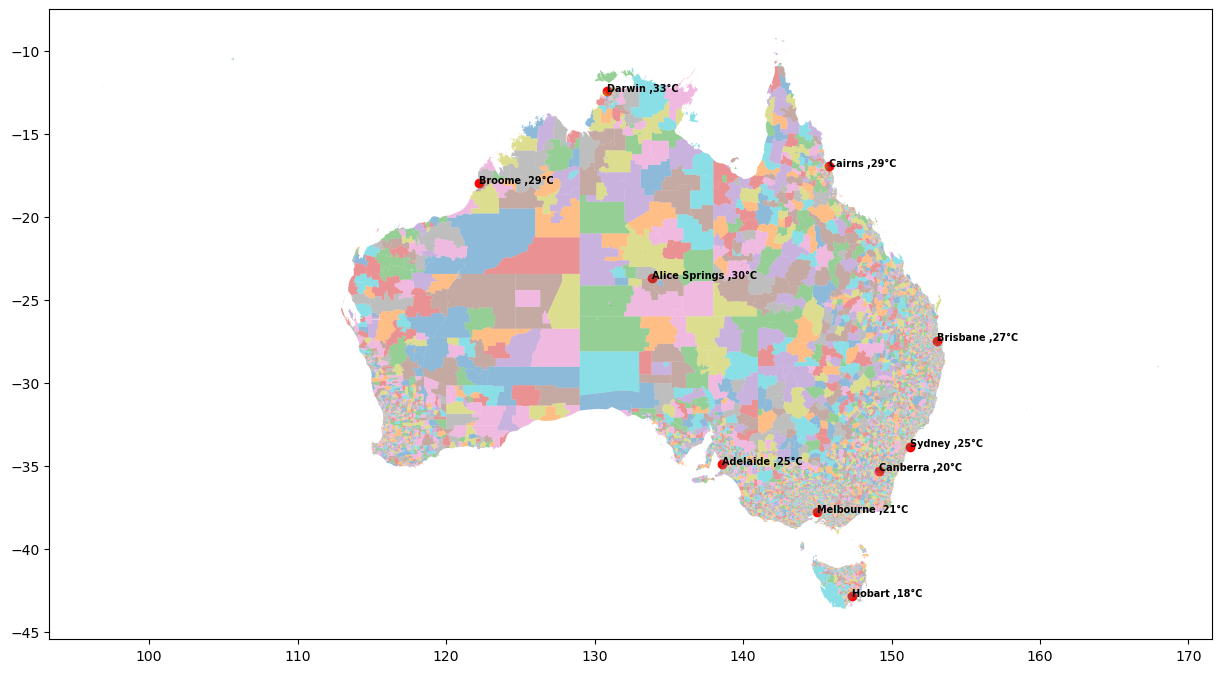

In [181]:
import shapely
import math
import json
import geopandas as geopd
georef= pd.read_csv('georef-australia-state-suburb.csv', delimiter =";", on_bad_lines = 'skip')
georef=georef.drop(9296)
shaped_list=[]
for ind, row in georef.iterrows():
    shaped=shapely.geometry.shape(json.loads(row['Geo Shape']))
    shaped_list.append(shaped)
shaped_df=pd.DataFrame(shaped_list)
shaped_df.columns=['Shape']
gdFrame=geopd.GeoDataFrame(shaped_df, geometry='Shape', crs=4326)
# gdFrame.plot()
gdCityFrame=geopd.GeoDataFrame(cityDict, geometry=geopd.points_from_xy(x=cityDict.lon, y=cityDict.lat), crs=4326)
# gdCityFrame.plot()
gdf_combined = geopd.sjoin(gdFrame, gdCityFrame)
fig,ax=plt.subplots(figsize=(15,15))
ax.scatter(cityDict.lon,cityDict.lat, color='red')
for idx, row in cityDict.iterrows():
    ax.text(row.lon,row.lat, row.city, fontsize=7, fontweight='bold', color='black')
gdFrame.plot(ax=ax,column='Shape', alpha=0.5)
# ax = gdFrame.plot(color='blue', edgecolor='black')
# fig, ax = plt.subplots(figsize=(15, 15))
# ax=gdCityFrame.plot(ax=ax, color='red', markersize=50)
# ax.scatter(gdf_combined.lon,gdf_combined.lat, color='red', alpha=0.8)
# for idx, row in cityDict.iterrows():
# #     print(row)
#     ax.text(row.lat,row.lon, row.city, fontsize=12, fontweight='bold', color='black', ha='center', va='center')
# gdFrame.plot(ax=ax,alpha=0.2, color='gray')
# ax.set_title('Cities on top of map', fontsize=20)
# ax.set_xlabel('Longitude', fontsize=16)
# ax.set_ylabel('Latitude', fontsize=16)
# plt.show()
# cityDict

In [173]:
'georef-australia-state-suburb.csv', delimiter =";"

SyntaxError: cannot assign to literal (3349085221.py, line 1)

In [81]:
from datetime import datetime
today = datetime.today().strftime("%d-%m-%Y")
today

'04-04-2023'

In [183]:
l1=[]
re={
    "he":"dvb",
    "hdhfd":"dskjv"
}
l1.append(re)
l1

[{'he': 'dvb', 'hdhfd': 'dskjv'}]

In [11]:
res={}
l1=[]
res['heh']=1
res['lel']="dfkjnv"
l1.append(res)
res1={}
res1['heh']=2
res1['lel']="ajaadu"
l1.append(res1)
l1[0]['heh']
l1.sort(key=lambda x: x['lel'])
l1

[{'heh': 2, 'lel': 'ajaadu'}, {'heh': 1, 'lel': 'dfkjnv'}]

In [12]:
global parser3
    parser3=reqparse.RequestParser()
    parser3.add_argument('order', type=str, default='+id')
    parser3.add_argument('page', type=str, default='1')
    parser3.add_argument('size', type=str, default='10')
    parser3.add_argument('filter', type=str, default='id,name')
    @api.expect(parser3)
    @api.response(400, 'No Data available for this page number')
    @api.response(404, 'Filters not found in database')
    @api.response(200, 'Event data retrieved Successful')
    @api.doc(description="Get all the events with optional information")
    def get(self):
        args=parser3.parse_args()
        event_order = args.get('order')
        event_filter= args.get('filter')
        page = int(args.get('page'))
        page_size = int(args.get('size'))
        # print(event_order,"   ",event_filter,"   ",page,"   ",page_size)
        filter1=event_filter.split(",")
        events = EventModel.query.all()
        even1=[]
        n=0
        
        event_list=[]
        for i in events:
            resp={}
            resp['id']=i.id
            resp['name']=i.name
            resp['date']=i.date
            resp['start_time']=i.start_time
            resp['end_time']=i.end_time
            resp['street']=i.street
            resp['suburb']=i.suburb
            resp['state']=i.state
            resp['post_code']=i.post_code
            resp['description']=i.description
            resp['last_update']=i.last_update
            event_list.append(resp)
        
        order1=event_order.split(",")
        even1=[]
        if len(event_list)<(page-1)*page_size:
            return {"message":'No Data available for this page number'}, 400

        temp=((page-1)*page_size)
        for j in range(1+temp,temp+1+page_size):
            n+=1
            if len(event_list)<j:
                break
            res2={}
            for filts in filter1:
                if filts not in event_list[j-1]:
                    return {"message": "Filters not found in database"}, 404
                res2[filts]=event_list[j-1][filts]
            even1.append(res2)
  
        response={
            "page": page,
            "page-size":page_size,
            "events":even1,
            "_links": {
                "self": {
                    "href": f"/events?order={event_order}&page={page}&size={page_size}&filter={event_filter}"
                },
                "next": {
                  "href": f"/events?order={event_order}&page={page+1}&size={page_size}&filter={event_filter}"
                }
            }
        }
        return response, 200

IndentationError: unexpected indent (2275344374.py, line 2)

In [ ]:
# change db name to z5378269
from datetime import datetime, time, timedelta
from flask import Flask, request, send_file
from flask_restx import Api, Resource, fields, reqparse
from flask_sqlalchemy import SQLAlchemy
import json
import requests
import pandas as pd
import shapely
import matplotlib.pyplot as plt
import geopandas as geopd
import sys


app = Flask(__name__)
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///events1.db'
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False
db = SQLAlchemy(app)
api = Api(app,default="MyCalendar",
          title="MyCalendar Dataset",
          description="This is a time-management and scheduling calendar service")
# db.init_app(app)
# @app.before_first_request
# def initialize_database():
#     db.create_all()
# Load the provided datasets
# georef = pd.read_csv('georef-australia-state-suburb.csv', delimiter =";", on_bad_lines = 'skip')
# cities = pd.read_csv('au_cities.csv', delimiter =",", on_bad_lines = 'skip')
# holidays = json.load(open('AU_public_holidays.json'))
georef = pd.read_csv(sys.argv[1], delimiter =";", on_bad_lines = 'skip')
cities = pd.read_csv(sys.argv[2], delimiter =",", on_bad_lines = 'skip')
# georef = sys.argv[1]
# cities = sys.argv[2]
# georef_arg = str(sys.argv[1])
# cities_arg = str(sys.argv[2])
# cities = pd.read_csv(cities_arg, delimiter =",")
# georef = pd.read_csv(georef_arg, delimiter =";", on_bad_lines = 'skip')
# define the data model for the event
event_model = api.model('Event', {
    'name': fields.String(required=True),
    'date': fields.String(required=True),
    'from': fields.String(required=True),
    'to': fields.String(required=True),
    'location': fields.Nested(api.model('Location', {
        'street': fields.String(required=True),
        'suburb': fields.String(required=True),
        'state': fields.String(required=True),
        'post-code': fields.String(required=True)
    })),
    'description': fields.String(required=True)
})
# define the events database as a list
# events_db = []

class EventModel(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    name = db.Column(db.String(100), nullable=False)
    date = db.Column(db.String(10), nullable=False)
    start_time = db.Column(db.String(8), nullable=False)
    end_time = db.Column(db.String(8), nullable=False)
    street = db.Column(db.String(100), nullable=False)
    suburb = db.Column(db.String(100), nullable=False)
    state = db.Column(db.String(100), nullable=False)
    post_code = db.Column(db.String(10), nullable=False)
    description = db.Column(db.String(1000))
    last_update = db.Column(db.String(19), nullable=False)
    
    def __repr__(self):
        return f"Event(name={self.name}, date={self.date}, start_time={self.start_time}, end_time={self.end_time}, street={self.street}, suburb={self.suburb}, state={self.state}, post_code={self.post_code}, description={self.description})"

# db.create_all()
@app.before_first_request
def initialize_database():
    db.create_all()
    
    
def check_overlaps(data):
    start_time = data['from']
    end_time = data['to']
    overlapping_events = EventModel.query.filter(
        (EventModel.date == data['date']) &
        (EventModel.start_time < end_time) &
        (EventModel.end_time > start_time)
    ).all()
    if overlapping_events:
            return True
    return False
    
# Define a function to check if a given date is a public holiday in Australia
def is_public_holiday(date):
    # with open('AU_public_holidays.json') as f:
    #     holidays = json.load(f)
    holidays=requests.get("https://date.nager.at/api/v2/publicholidays/2023/AU").json()
    for holiday in holidays:
        holiday_date = datetime.strptime(holiday['date'], '%Y-%m-%d')
        if holiday_date.date() == date:
            return holiday['name']
    return None

# @api.route('/events')
@api.route('/events/<int:event_id>')
class EventListGetDelPut(Resource):
    @api.response(404, 'Event was not found')
    @api.response(200, 'Event data retrieved Successful')
    @api.doc(description="Get an event by its ID")
    def get(self, event_id):
        # event = EventModel.query.get_or_404(event_id)
        event = EventModel.query.filter_by(id=event_id).first()
        if not event:
            return {'message': 'Event not found'}, 404
        # weather meat tags not complete 
        # geo_point = georef.loc[georef['Official Name Suburb']==event.suburb].iloc
        # lat,long=geo_point[0][0].split(", ")
        
        # check if its weekend
        event_date = datetime.strptime(event.date, '%d-%m-%Y').date()
        is_weekend = event_date.weekday() >= 5
        # check for holidays
        is_holiday = is_public_holiday(event_date)
        
        # Get the links
        # find the previous event (if any)
        previous_event = EventModel.query.filter((EventModel.date <= event.date) & (EventModel.id != event.id)).order_by(EventModel.date.desc(), EventModel.start_time.desc()).first()
        # find the next event (if any)
        next_event = EventModel.query.filter((EventModel.date >= event.date) & (EventModel.id != event.id)).order_by(EventModel.date, EventModel.start_time).first()
        
        # Weather api information retrieval
        suburb_names = [event.suburb] + [event.suburb + ' (NSW)'] + [event.suburb + ' (QLD)'] + [event.suburb + ' (WA)'] + [event.suburb + ' (NT)'] + [event.suburb + ' (SA)'] + [event.suburb + ' (TAS)'] + [event.suburb + ' (ACT)'] + [event.suburb + ' (VIC)']
        # city = cities[cities['admin_name'] == event.state].iloc[0]
        result_df = georef[georef['Official Name Suburb'].isin(suburb_names)]
        l1=list(result_df['Geo Point'])
        l2=l1[0].split(", ")
        lat, lon = l2[0],l2[1]
        response_data = requests.get(f"https://www.7timer.info/bin/civil.php?lon={lon}&lat={lat}&ac=0&unit=metric&output=json&tzshift=0").json()
        
        combine_date_time = datetime.strptime(event.date + ' ' + event.start_time, '%d-%m-%Y %H:%M:%S')
        get_hours = (combine_date_time - datetime.now()).total_seconds() / 3600
        response_data1 = response_data['dataseries']
        metadata={}
        if get_hours <= 168:
            for tpoint in response_data1:
                if tpoint['timepoint'] <= get_hours:
                    actual_timepoint=tpoint
            
            metadata={
            'wind-speed': str(actual_timepoint['wind10m']['speed']) +" KM",
            'weather': actual_timepoint['weather'],
            'humidity': actual_timepoint['rh2m'],
            'temperature': str(actual_timepoint["temp2m"]) + "°C",
            'holiday': is_holiday if is_holiday else 'No',
            'weekend': is_weekend
        }
        else:
            metadata={
            'holiday': is_holiday if is_holiday else 'No',
            'weekend': is_weekend
        }
        # Retrieve metadata information
        
        response = {
        'id': event.id,
        'last_update': event.last_update,
        'name': event.name,
        'date': event.date,
        'from': event.start_time,
        'to': event.end_time,
        'location': {
            'street': event.street,
            'suburb': event.suburb,
            'state': event.state,
            'post-code': event.post_code
        },
        'description': event.description,
        '_metadata': metadata,
        '_links': {
            'self': {'href': f'/events/{event.id}'},
            'previous': {'href': f"/events/{previous_event.id}"} if previous_event else "None",
            'next': {'href': f"/events/{next_event.id}"} if next_event else "None"
        }
        }
        
        return response, 200
    
    @api.response(404, 'Event was not found')
    @api.response(200, 'Successful')
    @api.doc(description="Delete an event by its ID")
    def delete(self,event_id):
        event = EventModel.query.filter_by(id=event_id).first()
        if not event:
            return {'message': 'Event not found'}, 404
        db.session.delete(event)
        db.session.commit()
        return {'message': 'The event with id {} was removed from the database!'.format(event_id), 'id': event_id}, 200
    
    
    @api.response(404, 'Event was not found')
    @api.response(400, 'Validation Error')
    @api.response(200, 'Successful')
    @api.expect(event_model, validate=True)
    @api.doc(description="Update an event by its ID")
    def patch(self,event_id):
        event = EventModel.query.filter_by(id=event_id).first()
        if not event:
            return {'message': 'Event not found'}, 404
        data = request.json
        for key in data:
            if key not in event_model.keys():
                return {"message": "Property {} is invalid".format(key)}, 400
        #     event.key=data[key]
        if 'name' in data:
            event.name=data['name']
        if 'date' in data:
            event.date=data['date']
        if 'from' in data:
            event.start_time=data['from']
        if 'to' in data:
            event.end_time=data['to']
        if 'street' in data['location']:
            event.street=data["location"]["street"]
        if 'suburb' in data['location']:
            event.suburb=data["location"]["suburb"]
        if 'state' in data['location']:
            event.state=data['location']['state']
        if 'post-code' in data['location']:
            event.post_code=data['location']['post-code']
        if 'description' in data:
            event.description=data['description']
        event.last_update=datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        db.session.commit()
        
        response = {
        'id': event.id,
        'last-update': event.last_update,
        '_links': {
            'self': {'href': f'/events/{event.id}'}
        }
        }
        return response, 200
        
@api.route('/events') 
class EventListPostGet(Resource):   
    global parser3
    parser3=reqparse.RequestParser()
    parser3.add_argument('order', type=str, default='+id')
    parser3.add_argument('page', type=str, default='1')
    parser3.add_argument('size', type=str, default='10')
    parser3.add_argument('filter', type=str, default='id,name')
    @api.expect(parser3)
    @api.response(400, 'No Data available for this page number')
    @api.response(404, 'Filters not found in database')
    @api.response(200, 'Event data retrieved Successful')
    @api.doc(description="Get all the events with optional information")
    def get(self):
        args=parser3.parse_args()
        event_order = args.get('order')
        event_filter= args.get('filter')
        page = int(args.get('page'))
        page_size = int(args.get('size'))
        # print(event_order,"   ",event_filter,"   ",page,"   ",page_size)
        filter1=event_filter.split(",")
        events = EventModel.query.all()
        even1=[]
        n=0
        
        event_list=[]
        for i in events:
            resp={}
            resp['id']=i.id
            resp['name']=i.name
            resp['date']=i.date
            resp['start_time']=i.start_time
            resp['end_time']=i.end_time
            resp['street']=i.street
            resp['suburb']=i.suburb
            resp['state']=i.state
            resp['post_code']=i.post_code
            resp['description']=i.description
            resp['last_update']=i.last_update
            event_list.append(resp)
        
        order1=event_order.split(",")
        if len(order1)>1:
            order1.reverse()
        for i in order1:
            if i== '+id':
                event_list.sort(key = lambda x:x['id'])
            
            if i == '-id':
                event_list.sort(key = lambda x:x['id'])
                event_list.reverse()
                    
            if i== '+name':
                event_list.sort(key = lambda x:x['name'])
                    
            if i== '-name':
                event_list.sort(key = lambda x: x['name'])
                event_list.reverse()
                    
            if i== '+datetime':
                event_list.sort(key = lambda x: datetime.strptime(x['date'] + ' ' + x['start_time'], '%d-%m-%Y %H:%M:%S'))
                      
            if i== '-datetime':
                event_list.sort(key = lambda x: datetime.strptime(x['date'] + ' ' + x['start_time'], '%d-%m-%Y %H:%M:%S'))
                event_list.reverse()
                
            if i== '+date':
                event_list.sort(key = lambda x: datetime.strptime(x['date'], '%d-%m-%Y'))
            
            if i == '-date':
                event_list.sort(key = lambda x: datetime.strptime(x['date'], '%d-%m-%Y'))
                event_list.reverse()
                
            if i== '+from':
                event_list.sort(key = lambda x: datetime.strptime(x['start_time'], '%H:%M:%S'))
            
            if i == '-from':
                event_list.sort(key = lambda x: datetime.strptime(x['start_time'], '%H:%M:%S'))
                event_list.reverse()
                
            if i== '+to':
                event_list.sort(key = lambda x:datetime.strptime(x['end_time'], '%H:%M:%S'))
            
            if i == '-to':
                event_list.sort(key = lambda x:datetime.strptime(x['end_time'], '%H:%M:%S'))
                event_list.reverse()
                
            if i== '+street':
                event_list.sort(key = lambda x:x['street'])
            
            if i == '-street':
                event_list.sort(key = lambda x:x['street'])
                event_list.reverse()
                
            if i== '+suburb':
                event_list.sort(key = lambda x:x['suburb'])
            
            if i == '-suburb':
                event_list.sort(key = lambda x:x['suburb'])
                event_list.reverse()
            
            if i== '+state':
                event_list.sort(key = lambda x:x['state'])
            
            if i == '-state':
                event_list.sort(key = lambda x:x['state'])
                event_list.reverse()
                
            if i== '+post-code':
                event_list.sort(key = lambda x:x['post_code'])
            
            if i == '-post-code':
                event_list.sort(key = lambda x:x['post_code'])
                event_list.reverse()
                
            if i== '+description':
                event_list.sort(key = lambda x:x['description'])
            
            if i == '-description':
                event_list.sort(key = lambda x:x['description'])
                event_list.reverse()
                
            if i== '+last-update':
                event_list.sort(key = lambda x:datetime.strptime(x['last_update'], '%Y-%m-%d %H:%M:%S'))
            
            if i == '-last_update':
                event_list.sort(key = lambda x:datetime.strptime(x['last_update'], '%Y-%m-%d %H:%M:%S'))
                event_list.reverse()
        
        even1=[]
        if len(event_list)<(page-1)*page_size:
            return {"message":'No Data available for this page number'}, 400

        temp=((page-1)*page_size)
        for j in range(1+temp,temp+1+page_size):
            n+=1
            if len(event_list)<j:
                break
            res2={}
            for filts in filter1:
                if filts not in event_list[j-1]:
                    return {"message": "Filters not found in database"}, 404
                res2[filts]=event_list[j-1][filts]
            even1.append(res2)
        # print(event_list)
        if n+page_size*(page-1)<len(event_list):
            n=page+1
        else:
            n=page
        response={
            "page": page,
            "page-size":page_size,
            "events":even1,
            "_links": {
                "self": {
                    "href": f"/events?order={event_order}&page={page}&size={page_size}&filter={event_filter}"
                },
                "next": {
                  "href": f"/events?order={event_order}&page={n}&size={page_size}&filter={event_filter}"
                }
            }
        }

        return response, 200
    
    
    @api.response(201, 'Data added Successfully')
    @api.response(400, 'Validation Error')
    @api.doc(description="create a new event")
    @api.expect(event_model)
    def post(self):
        # event = request.json
        data = api.payload
        
        if check_overlaps(data):
            return {'message': 'Event overlaps with existing event'}, 400
   
        # Add new event to database
        new_event = EventModel(
            name=data['name'],
            date=data['date'],
            start_time=data['from'],
            end_time=data['to'],
            street=data['location']['street'],
            suburb=data['location']['suburb'],
            state=data['location']['state'],
            post_code=data['location']['post-code'],
            description=data['description'],
            last_update=datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        )
        db.session.add(new_event)
        db.session.commit()
        
        # Return the response
        response = {
            'id': new_event.id,
            'last-update': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            '_links': {
                'self': {
                    'href': f'/events/{new_event.id}'
                }
            }
        }
        return response, 201
    
    
    
    
@api.route('/events/statistics') 
class EventListGetStat(Resource):
    global parser1
    parser1=reqparse.RequestParser()
    parser1.add_argument('format', type=str, choices=('json', 'image'), default='json')
    @api.expect(parser1)
    @api.response(404, 'Event was not found')
    @api.response(200, 'Event data retrieved Successful')
    @api.doc(description="Get an event statistics by its ID")
    def get(self):
        args=parser1.parse_args()
        format1 = args.get('format')
        
        events = EventModel.query.all()
        if not events:
            return {'message': 'Event not found'}, 404
        
        # Calculate statistics
        total_events = len(events)
        today = datetime.now().date()
        start_of_week = today - timedelta(days=today.weekday())
        end_of_week = start_of_week + timedelta(days=6)
        start_of_month = datetime(today.year, today.month, 1).date()
        end_of_month = datetime(today.year, today.month+1, 1).date() - timedelta(days=1)
        events_per_day = {}
        for event in events:
            date = datetime.strptime(event.date, '%d-%m-%Y').date()
            if date in events_per_day:
                events_per_day[date] += 1
            else:
                events_per_day[date] = 1
        events_this_week = sum(1 for event in events if datetime.strptime(event.date, '%d-%m-%Y').date() >= start_of_week and datetime.strptime(event.date, '%d-%m-%Y').date() <= end_of_week)
        events_this_month = sum(1 for event in events if datetime.strptime(event.date, '%d-%m-%Y').date() >= start_of_month and datetime.strptime(event.date, '%d-%m-%Y').date() <= end_of_month)
        
        formatted_dates = {date.strftime('%d-%m-%Y'): events_per_day[date] for date in events_per_day}
        sorted_dict = dict(sorted(formatted_dates.items(), key=lambda x: datetime.strptime(x[0], '%d-%m-%Y')))
        if format1 == 'json':
            
            return {
                "total": total_events,
                "total-current-week": events_this_week,
                "total-current-month": events_this_month,
                "per-days": sorted_dict
            }, 200
        elif format1 == 'image':
            # Generate and return image visualization
            fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 11))
            # Create bar chart for events per day
            
            ax1.plot(sorted_dict.keys(), sorted_dict.values())
            ax1.tick_params(axis='x', labelrotation=45)
            ax1.set_title("Number of Events per Day")
            ax1.set_xlabel("Date")
            ax1.set_ylabel("Number of Events")
            # Create pie chart for total events
            labels = ["Current Month", "Other Months"]
            sizes = [events_this_month, total_events - events_this_month]
            ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
            ax2.set_title("Total Number of Events")
            
            fig.suptitle('Calendar Statistics', fontsize=16)
            # plt.xticks(rotation=90)
            plt.savefig('calendar_statistics.png')
            plt.close()
            return send_file('calendar_statistics.png', mimetype='image/png')
        else:
            return f"Invalid format{format1} parameter. Must be 'json' or 'image'.", 400

@api.route('/weather') 
class EventListGetWeather(Resource):
    global parser2
    parser2=reqparse.RequestParser()
    parser2.add_argument('date', type=str)
    @api.expect(parser2)
    @api.response(400, 'Date provided should be within 7 days')
    @api.response(200, 'Event data retrieved Successful')
    @api.doc(description="Get Weather Info as an image")
    def get(self):
        args=parser2.parse_args()
        future_date = args.get('date')
        today = datetime.today().strftime("%d-%m-%Y")
        today = datetime.strptime(today, '%d-%m-%Y').date()
        # future_date = request.args.get('date','05-04-2023')
        future_date = datetime.strptime(future_date, '%d-%m-%Y').date()
        num_days = (future_date - today).days
        cityDict = pd.DataFrame()
        if num_days*24 <= 168:
            city_names = ["Sydney", "Canberra", "Hobart", "Melbourne", "Adelaide", "Perth", "Alice Springs", "Broome", "Darwin", "Cairns", "Brisbane"]
            
            for city in city_names:
                result_df = cities[cities['city']==(city)]
                l1=str(result_df['lat']).split(" ")
                lat=l1[3].split("\n")[0]
                l2=str(result_df['lng']).split(" ")
                lon=l2[4].split("\n")[0]
                response_data = requests.get(f"https://www.7timer.info/bin/civil.php?lon={lon}&lat={lat}&ac=0&unit=metric&output=json&tzshift=0").json()
                # today = datetime.date.today()
                response_data1 = response_data['dataseries']
                for tpoint in response_data1:
                    if tpoint['timepoint'] <= num_days*24:
                        actual_timepoint=tpoint
                
                if city != 'Perth':
                    new_row={'city': city + " ," + str(actual_timepoint["temp2m"]) + "°C", 'lat': float(lat), 'lon': float(lon)}
                    cityDict=cityDict.append(new_row, ignore_index=True)
            
            georef1=georef.drop(9296)
            # cityDict=cityDict.set_index('city')
            shaped_list=[]
            for ind, row in georef1.iterrows():
                shaped=shapely.geometry.shape(json.loads(row['Geo Shape']))
                shaped_list.append(shaped)
            shaped_df=pd.DataFrame(shaped_list)
            shaped_df.columns=['Shape']
            gdFrame=geopd.GeoDataFrame(shaped_df, geometry='Shape', crs=4326)
            # gdFrame.plot()
            gdCityFrame=geopd.GeoDataFrame(cityDict, geometry=geopd.points_from_xy(x=cityDict.lon, y=cityDict.lat), crs=4326)
            # gdCityFrame.plot()
            gdf_combined = geopd.sjoin(gdFrame, gdCityFrame)
            fig,ax=plt.subplots(figsize=(15,15))
            ax.scatter(cityDict.lon,cityDict.lat, color='red')
            for idx, row in cityDict.iterrows():
                ax.text(row.lon,row.lat, row.city, fontsize=11, fontweight='bold', color='black')
            gdFrame.plot(ax=ax,column='Shape', alpha=0.5)
            plt.savefig('weather_forcast.png')
            plt.close()
            return send_file('weather_forcast.png', mimetype='image/png')
        else:
            return {"message": "Date provided should be within 7 days"}, 400
        
        
# @api.route('/events') 
# class EventListGetPageOrder(Resource):
    
        
        
if __name__ == '__main__':
    # cities = pd.read_csv('au_cities.csv')
    # holidays = json.load(open('AU_public_holidays.json'))
    # georef_arg = sys.argv[1]
    # cities_arg = sys.argv[2]
    # cities = pd.read_csv(cities_arg, delimiter =",")
    # georef = pd.read_csv(georef_arg, delimiter =";", on_bad_lines = 'skip')
    # holidays = json.load(open('AU_public_holidays.json'))
    app.run()
